In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
# Create an instance of the ImageDataGenerator with augmentation options
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [5]:
# Load the image and convert it to a numpy array
img = load_img('G:/datasets/dog.jpg')  # Make sure the image path is correct
img_arr = img_to_array(img)

In [7]:
# Convert image array to shape (1, height, width, 3)
img_arr = img_arr.reshape((1,) + img_arr.shape)

In [9]:
# Create 'aug' directory if it doesn't exist
if not os.path.exists('aug'):
    os.mkdir('aug')

In [11]:
# Generate and save augmented images
i = 0
for batch in datagen.flow(
    img_arr,
    batch_size=1,
    save_to_dir='aug',
    save_prefix='Aug_Img',
    save_format='jpeg'
):
    i += 1
    if i > 10:
        break

In [13]:
# Load the generated images using glob
images = []
for img_path in glob.glob('aug/*.jpeg'):
    images.append(mpimg.imread(img_path))

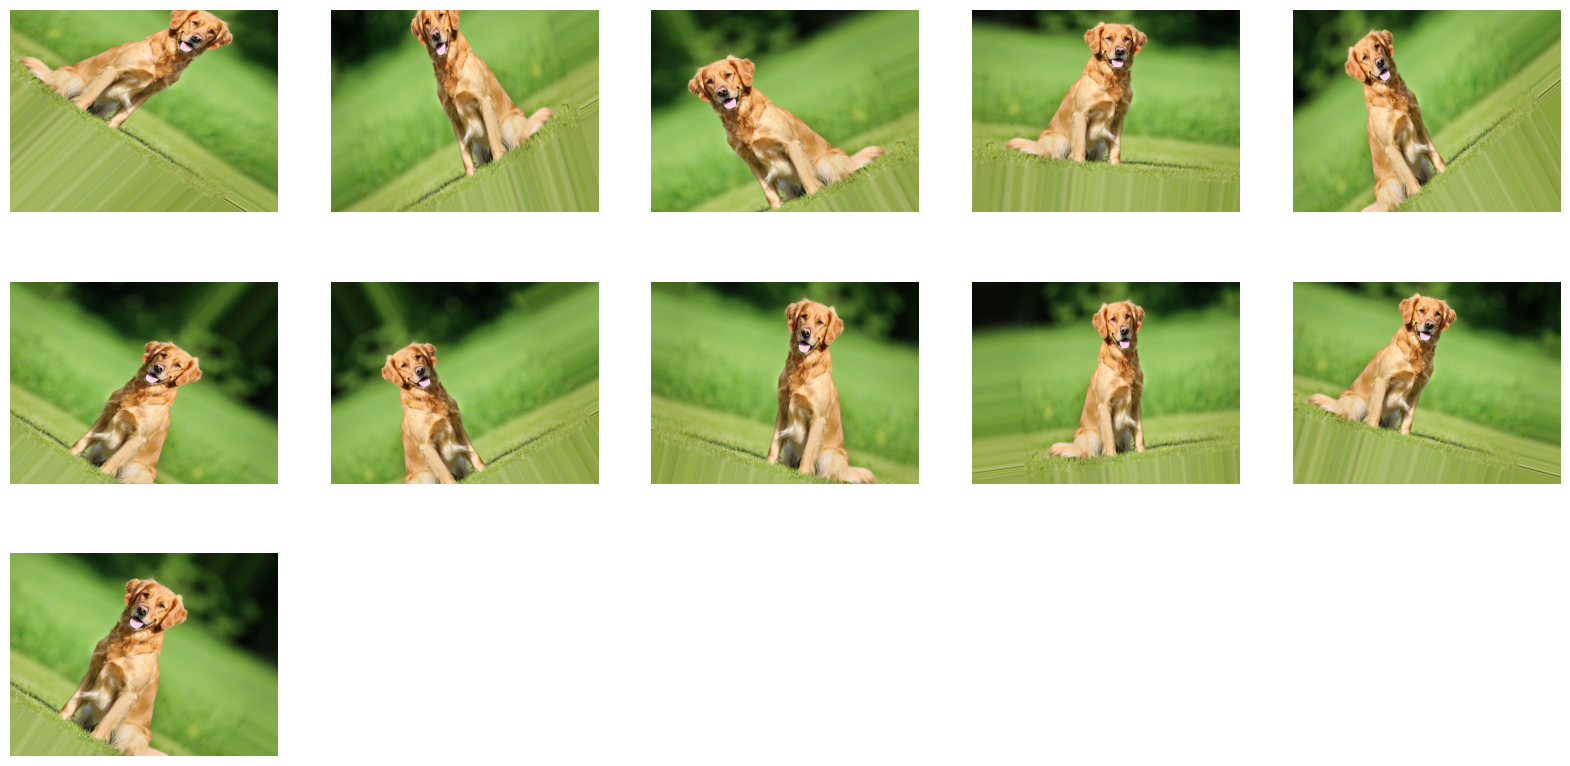

In [15]:
# Display the images using matplotlib
plt.figure(figsize=(20, 10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) // columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.axis('off')  # Turn off axis labels
plt.show()